In [114]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import joblib

In [116]:
import pandas as pd
import sqlite3
import regex as re


#create dataframe from csv

df = pd.read_csv('nlp/emails.csv', sep =",", names = ['type', 'text'])
df.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [70]:
#len(CreditRisk_df['contract_number'].unique())

In [123]:
df['spam']= df['type'].map({'spam':1, 'ham':0}).astype(int)
df.head(5)

,type,text,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [125]:
print("spam count: "+ str(len(df.loc[df.spam==1])))

print("not spam count: "+ str(len(df.loc[df.spam==0])))

print(df.shape)

spam count: 18
not spam count: 98
(116, 3)


In [128]:
df['spam'] = df['spam'].astype(int)
df = df.drop_duplicates()

df = df.reset_index(inplace = False)[['text','spam']]

In [129]:
clean_desc = []
for w in range (len(df.text)):
    desc = df['text'][w].lower()
    # remove punctuation
    desc = re.sub('[^a-zA-Z]', ' ', desc)
    
    # remove tags
    desc = re.sub("&lt;/?.*?&gt;"," &lt;&gt; ", desc)
     #remove digits and special chars
    desc = re.sub("(\\d|\\W)+"," ",desc)
    
    clean_desc.append(desc)
    
#assign the cleaned descriptions to the data frame
df['text'] = clean_desc
df.head(3)

,text,spam
0,go until jurong point crazy available only in ...,0
1,ok lar joking wif u oni,0
2,free entry in a wkly comp to win fa cup final ...,1


In [132]:
stop_words = ['is','you','your','and', 'the', 'to', 'from', 'or', 'I', 'for', 'do', 'get', 'not', 'here', 'in', 'im', 'have', 'on', 're', 'new', 'subject']

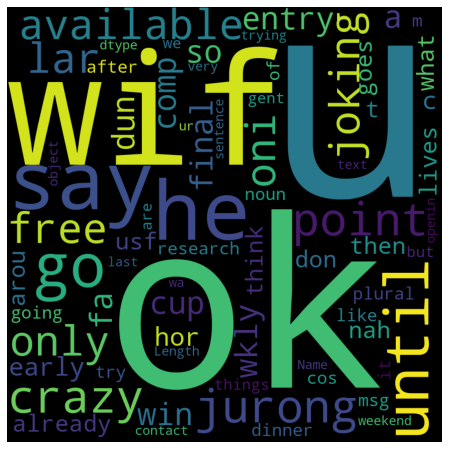

In [133]:
wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', stopwords = stop_words, max_words = 1000
                      , min_font_size = 20).generate(str(df['text']))
#plot the word cloud

fig = plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [72]:
print("COLUMS IN THE GIVEN DATA:")
for col in df.columns:
    print(col)

COLUMS IN THE GIVEN DATA:
type
text
spam


In [73]:
t=len(df['type'])
print("NO OF ROWS IN REVIEW COLUMN:",t)
t=len(df['text'])
print("NO OF ROWS IN liked COLUMN:",t)

NO OF ROWS IN REVIEW COLUMN: 116
NO OF ROWS IN liked COLUMN: 116


In [74]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [75]:
def tokenizer(text):
    return text.split()

In [76]:
df['text']=df['text'].apply(tokenizer)

In [77]:
df['text'][10]

["I'm",
 'gonna',
 'be',
 'home',
 'soon',
 'and',
 'i',
 "don't",
 'want',
 'to',
 'talk',
 'about',
 'this',
 'stuff',
 'anymore',
 'tonight,',
 'k?',
 "I've",
 'cried',
 'enough',
 'today.']

In [78]:
pip install nltk

In [94]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rtavakoli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [96]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rtavakoli\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [80]:
from nltk.stem.snowball import SnowballStemmer
porter = SnowballStemmer("english", ignore_stopwords=False)

In [81]:
def stemmer(text):
    return [porter.stem(word) for word in text]

In [82]:
df['text']=df['text'].apply(stemmer)

In [83]:
df['text'][10]

["i'm",
 'gonna',
 'be',
 'home',
 'soon',
 'and',
 'i',
 "don't",
 'want',
 'to',
 'talk',
 'about',
 'this',
 'stuff',
 'anymor',
 'tonight,',
 'k?',
 "i'v",
 'cri',
 'enough',
 'today.']

In [84]:
df['text'][50]

['what',
 'you',
 'think',
 'about',
 'me.',
 'first',
 'time',
 'you',
 'saw',
 'me',
 'in',
 'class.']

In [85]:
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [86]:
def lemmatize_it(text):
    return [lemmatizer.lemmatize(word, pos ="a") for word in text]

In [87]:
df['text']=df['text'].apply(lemmatize_it)

In [88]:
df['text'][50]

['what',
 'you',
 'think',
 'about',
 'me.',
 'first',
 'time',
 'you',
 'saw',
 'me',
 'in',
 'class.']

In [97]:
from nltk.corpus import stopwords

In [98]:
stop_words = stopwords.words('english')

In [99]:
def stop_it(text):
    review = [word for word in text if not word in stop_words]
    return review

In [100]:
df['text'] = df['text'].apply(stop_it)

In [101]:
df['text'][2]

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkts',
 '21st',
 'may',
 '2005.',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question(std',
 'txt',
 'rate)t&c',
 'appli',
 '08452810075over18']

In [102]:
df.head(10)

,type,text,spam
0,ham,"[go, jurong, point,, crazy.., avail, onli, bug...",0
1,ham,"[ok, lar..., joke, wif, u, oni...]",0
2,spam,"[free, entri, 2, wkli, comp, win, fa, cup, fin...",1
3,ham,"[u, dun, say, earli, hor..., u, c, alreadi, sa...",0
4,ham,"[nah, think, goe, usf,, live, around, though]",0
5,spam,"[freemsg, hey, darl, 3, week, word, back!, i'd...",1
6,ham,"[even, brother, like, speak, me., treat, like,...",0
7,ham,"[per, request, mell, mell, (oru, minnaminungin...",0
8,spam,"[winner!!, valu, network, custom, select, rece...",1
9,spam,"[mobil, 11, month, more?, u, r, entitl, updat,...",1


In [103]:
df['text']=df['text'].apply(' '.join)

In [104]:
df.head()

,type,text,spam
0,ham,"go jurong point, crazy.. avail onli bugi n gre...",0
1,ham,ok lar... joke wif u oni...,0
2,spam,free entri 2 wkli comp win fa cup final tkts 2...,1
3,ham,u dun say earli hor... u c alreadi say...,0
4,ham,"nah think goe usf, live around though",0


In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
y=df.spam.values
x = tfidf.fit_transform(df['text'])

In [108]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2,shuffle=False)

In [109]:
from sklearn.linear_model import LogisticRegression
clf=LogisticRegression()

clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

from sklearn.metrics import accuracy_score
acc_log = accuracy_score(y_pred, y_test)*100
print("accuracy:",acc_log )

accuracy: 87.5


In [110]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC(random_state=0)

linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_test)

acc_linear_svc =accuracy_score(y_pred, y_test) * 100
print("accuracy:",acc_linear_svc)

accuracy: 87.5


In [112]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 6, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)
acc_logreg2 = round(accuracy_score(y_pred, y_test) , 2)*100
print("Accuracy : ",acc_logreg2)

Accuracy :  88.0


In [113]:
pip install wordcloud

In [122]:
from wordcloud import WordCloud

In [145]:
pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [13]:
import sys
print (sys.version)

3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]


In [25]:
#python -m textblob.download_corpora

In [ ]:
# User_Based Collaborative Filtering
# Build a matrix of things each user bought/viewed/rated
# Compute similarity scores between users
# Find users similar to you
# Recommend stuff they bought

In [ ]:
# item_based Collaborative Filtering


In [ ]:
def find_longest_string(list_of_strings):
    longest_string = None
    longest_string_len = 0
    
    for s in list_of_strings:
        if len(s) > longest_string_len:
            longest_string_len = len(s)
            longest_string = s
    return longest_string

In [ ]:
list_of_strings = ['abc', 'python', 'dima']
%time max_length = print(find_longest_string(list_of_strings))

In [ ]:
%%time
# step 1:
list_of_string_lens = [len(s) for s in list_of_strings]
list_of_string_lens = zip(list_of_strings, list_of_string_lens)
#step 2:
max_len = max(list_of_string_lens, key=lambda t: t[1])
print(max_len)

In [ ]:
%%time
#step 1
mapped = map(mapper, list_of_strings)
mapped = zip(list_of_strings, mapped)
#step 2:
reduced = reduce(reducer, mapped)
print(reduced)

In [ ]:
data_chunks = chunkify(list_of_strings, number_of_chunks=30)

#step 1:
reduced_all = []
for chunk in data_chunks:
    mapped_chunk = map(mapper, chunk)
    mapped_chunk = zip(chunk, mapped_chunk)
    
    reduced_chunk = reduce(reducer, mapped_chunk)
    reduced_all.append(reduced_chunk)
    
#step 2:
reduced = reduce(reducer, reduced_all)
print(reduced)

In [ ]:
def chunks_mapper(chunk):
    mapped_chunk = map(mapper, chunk)
    mapped_chunk = zip(chunk, mapped_chunk)
    return reduce(reducer, mapped_chunk)
%%time
data_chunks = chunkify(list_of_strings, number_of_chunks=30)
#step 1:
mapped = map(chunks_mapper, data_chunks)
#step 2:
reduced = reduce(reducer, mapped)
print(reduced)


In [ ]:
from multiprocessing import Pool
pool = Pool(8)
data_chunks = chunkify(large_list_of_strings, number_of_chunks=8)
#step 1:
mapped = pool.map(mapper, data_chunks)
#step 2:
reduced = reduce(reducer, mapped)
print(reduced)

In [ ]:
def clean_wprd(word):
    return re.sub(r'[^\w\s]','', word).lower()

def word_not_in_stopwords(word):
    return word not in ENGLISH_STOP_WORDS and word and word.isalph()

def find_top_words(data):
    cnt = Counter()
    for text in data:
        tokens_in_text = text.split()
        tokens_in_text = map(clean_word, tokens_in_text)
        tokens_in_text = filter(word_not_in_stopwords, tokens_in_text)
        
        cnt.update(tokens_in_text)
    
      return cnt.most_common(10)  